In [3]:
import numpy as np 
import pandas as pd 

import os
print(os.listdir("."))

['.ipynb_checkpoints', 'dev_NLI_B.tsv', 'Model Evaluation.ipynb', 'test_ep_2.txt']


In [4]:
test_model = pd.read_csv('test_ep_2.txt', sep=' ', header=None)
test_model.head()

,0,1,2
0,1,0.373111,0.626889
1,1,0.373111,0.626889
2,0,0.979118,0.020882
3,0,0.979118,0.020882
4,0,0.754728,0.245272


In [5]:
test_orig = pd.read_csv('dev_NLI_B.tsv', sep='\t')
test_orig.head()

,id,sentence1,polarity,context,target,aspect,label
0,1252,"Bastante grande, variedad en productos, rápido...",Positive,Tienda de Autoservicio,lugar,general,1
1,1252,"Bastante grande, variedad en productos, rápido...",Positive,Tienda de Autoservicio,lugar,general,1
2,1252,"Bastante grande, variedad en productos, rápido...",None,Tienda de Autoservicio,lugar,general,0
3,1252,"Bastante grande, variedad en productos, rápido...",None,Tienda de Autoservicio,lugar,general,0
4,1252,"Bastante grande, variedad en productos, rápido...",Negative,Tienda de Autoservicio,lugar,general,0


In [6]:
test = pd.concat([test_model, test_orig], axis = 1)
test['label_pred'] = test[0]
test.head()

,0,1,2,id,sentence1,polarity,context,target,aspect,label,label_pred
0,1,0.373111,0.626889,1252,"Bastante grande, variedad en productos, rápido...",Positive,Tienda de Autoservicio,lugar,general,1,1
1,1,0.373111,0.626889,1252,"Bastante grande, variedad en productos, rápido...",Positive,Tienda de Autoservicio,lugar,general,1,1
2,0,0.979118,0.020882,1252,"Bastante grande, variedad en productos, rápido...",None,Tienda de Autoservicio,lugar,general,0,0
3,0,0.979118,0.020882,1252,"Bastante grande, variedad en productos, rápido...",None,Tienda de Autoservicio,lugar,general,0,0
4,0,0.754728,0.245272,1252,"Bastante grande, variedad en productos, rápido...",Negative,Tienda de Autoservicio,lugar,general,0,0


# Real labels

In [7]:
test['asp_pol_real'] = np.select([(test['aspect'] == 'general') & (test['polarity'] == 'Positive') & (test['label'] == 0), 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'general') & (test['polarity'] == 'None') & (test['label'] == 0), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Positive') & (test['label'] == 0), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'None') & (test['label'] == 0), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Positive') & (test['label'] == 0), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'None') & (test['label'] == 0), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Positive') & (test['label'] == 0), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'None') & (test['label'] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Positive') & (test['label'] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'None') & (test['label'] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Positive') & (test['label'] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Negative') & (test['label'] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'None') & (test['label'] == 0),
                                 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Positive') & (test['label'] == 1), 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'general') & (test['polarity'] == 'None') & (test['label'] == 1), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Positive') & (test['label'] == 1), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'None') & (test['label'] == 1), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Positive') & (test['label'] == 1), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'None') & (test['label'] == 1), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Positive') & (test['label'] == 1), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'None') & (test['label'] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Positive') & (test['label'] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'None') & (test['label'] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Positive') & (test['label'] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Negative') & (test['label'] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'None') & (test['label'] == 1),
                                 ], 
                                        ['GP0', 'GN0', 'G-0', 
                                         'SP0', 'SN0', 'S-0', 
                                         'AP0', 'AN0', 'A-0', 
                                         '$P0', '$N0', '$-0',
                                         'CP0', 'CN0', 'C-0', 
                                         'UP0', 'UN0', 'U-0',
                                        
                                         'GP1', 'GN1', 'G-1', 
                                         'SP1', 'SN1', 'S-1', 
                                         'AP1', 'AN1', 'A-1', 
                                         '$P1', '$N1', '$-1',
                                         'CP1', 'CN1', 'C-1', 
                                         'UP1', 'UN1', 'U-1'])

# Predicted labels

In [8]:
test['asp_pol_pred'] = np.select([(test['aspect'] == 'general') & (test['polarity'] == 'Positive') & (test['label_pred'] == 0), 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Negative') & (test['label_pred'] == 0),
                                  (test['aspect'] == 'general') & (test['polarity'] == 'None') & (test['label_pred'] == 0), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Positive') & (test['label_pred'] == 0), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Negative') & (test['label_pred'] == 0),
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'None') & (test['label_pred'] == 0), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Positive') & (test['label_pred'] == 0), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Negative') & (test['label_pred'] == 0),
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'None') & (test['label_pred'] == 0), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Positive') & (test['label_pred'] == 0), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Negative') & (test['label_pred'] == 0),
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'None') & (test['label_pred'] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Positive') & (test['label_pred'] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Negative') & (test['label_pred'] == 0),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'None') & (test['label_pred'] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Positive') & (test['label_pred'] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Negative') & (test['label_pred'] == 0),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'None') & (test['label_pred'] == 0),
                                 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Positive') & (test['label_pred'] == 1), 
                                  (test['aspect'] == 'general') & (test['polarity'] == 'Negative') & (test['label_pred'] == 1),
                                  (test['aspect'] == 'general') & (test['polarity'] == 'None') & (test['label_pred'] == 1), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Positive') & (test['label_pred'] == 1), 
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'Negative') & (test['label_pred'] == 1),
                                  (test['aspect'] == 'servicio') & (test['polarity'] == 'None') & (test['label_pred'] == 1), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Positive') & (test['label_pred'] == 1), 
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'Negative') & (test['label_pred'] == 1),
                                  (test['aspect'] == 'ambiente') & (test['polarity'] == 'None') & (test['label_pred'] == 1), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Positive') & (test['label_pred'] == 1), 
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'Negative') & (test['label_pred'] == 1),
                                  (test['aspect'] == 'precio') & (test['polarity'] == 'None') & (test['label_pred'] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Positive') & (test['label_pred'] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'Negative') & (test['label_pred'] == 1),
                                  (test['aspect'] == 'comida') & (test['polarity'] == 'None') & (test['label_pred'] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Positive') & (test['label_pred'] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'Negative') & (test['label_pred'] == 1),
                                  (test['aspect'] == 'ubicaciÃn') & (test['polarity'] == 'None') & (test['label_pred'] == 1),
                                 ], 
                                        ['GP0', 'GN0', 'G-0', 
                                         'SP0', 'SN0', 'S-0', 
                                         'AP0', 'AN0', 'A-0', 
                                         '$P0', '$N0', '$-0',
                                         'CP0', 'CN0', 'C-0', 
                                         'UP0', 'UN0', 'U-0',
                                        
                                         'GP1', 'GN1', 'G-1', 
                                         'SP1', 'SN1', 'S-1', 
                                         'AP1', 'AN1', 'A-1', 
                                         '$P1', '$N1', '$-1',
                                         'CP1', 'CN1', 'C-1', 
                                         'UP1', 'UN1', 'U-1'])

In [9]:
test.head()

,0,1,2,id,sentence1,polarity,context,target,aspect,label,label_pred,asp_pol_real,asp_pol_pred
0,1,0.373111,0.626889,1252,"Bastante grande, variedad en productos, rápido...",Positive,Tienda de Autoservicio,lugar,general,1,1,GP1,GP1
1,1,0.373111,0.626889,1252,"Bastante grande, variedad en productos, rápido...",Positive,Tienda de Autoservicio,lugar,general,1,1,GP1,GP1
2,0,0.979118,0.020882,1252,"Bastante grande, variedad en productos, rápido...",None,Tienda de Autoservicio,lugar,general,0,0,G-0,G-0
3,0,0.979118,0.020882,1252,"Bastante grande, variedad en productos, rápido...",None,Tienda de Autoservicio,lugar,general,0,0,G-0,G-0
4,0,0.754728,0.245272,1252,"Bastante grande, variedad en productos, rápido...",Negative,Tienda de Autoservicio,lugar,general,0,0,GN0,GN0


In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
from matplotlib.pyplot import figure
import seaborn as sns
sns.set(style='darkgrid')

def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues, clean=False, figsize=(20, 16), dpi=300):
    
    cm = confusion_matrix(y_true, y_pred)    
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    if clean:
        # indexes of No's '0'  and  None's '-'
        indexes = [i for i, c in enumerate(classes) if c.endswith('0') or  '-' in c]
        
        cm = np.delete(cm, indexes, axis=0)
        cm = np.delete(cm, indexes, axis=1)
        
        cm_norm = np.delete(cm_norm, indexes, axis=0)
        cm_norm = np.delete(cm_norm, indexes, axis=1)
        
        classes = np.delete(classes, indexes, axis=0)
        
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    
    im = ax.imshow(cm_norm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, 
           yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label',
           title="Precisión promedio = {0:.2f} %".format(np.mean(cm.diagonal())) if clean else "")

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    fmt_norm = '.2f'
    
    thresh = 50
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if cm[i, j] == 0:
                continue
            ax.text(j, i, '\n' + format(cm[i, j], fmt), fontsize=8,
                    ha="center",  va="top",
                    color="white" if cm_norm[i, j] > thresh else "black")
            
            if not math.isnan(cm_norm[i, j]):
                ax.text(j, i, format(cm_norm[i, j], fmt_norm) + '%', fontsize=8,
                        ha="center",  va="bottom",
                        color="white" if cm_norm[i, j] > thresh else "black")
        
    
    fig.tight_layout()
    return ax

In [14]:
y_real = test['asp_pol_real'].values
y_pred = test['asp_pol_pred'].values

# Matriz de confusión completa

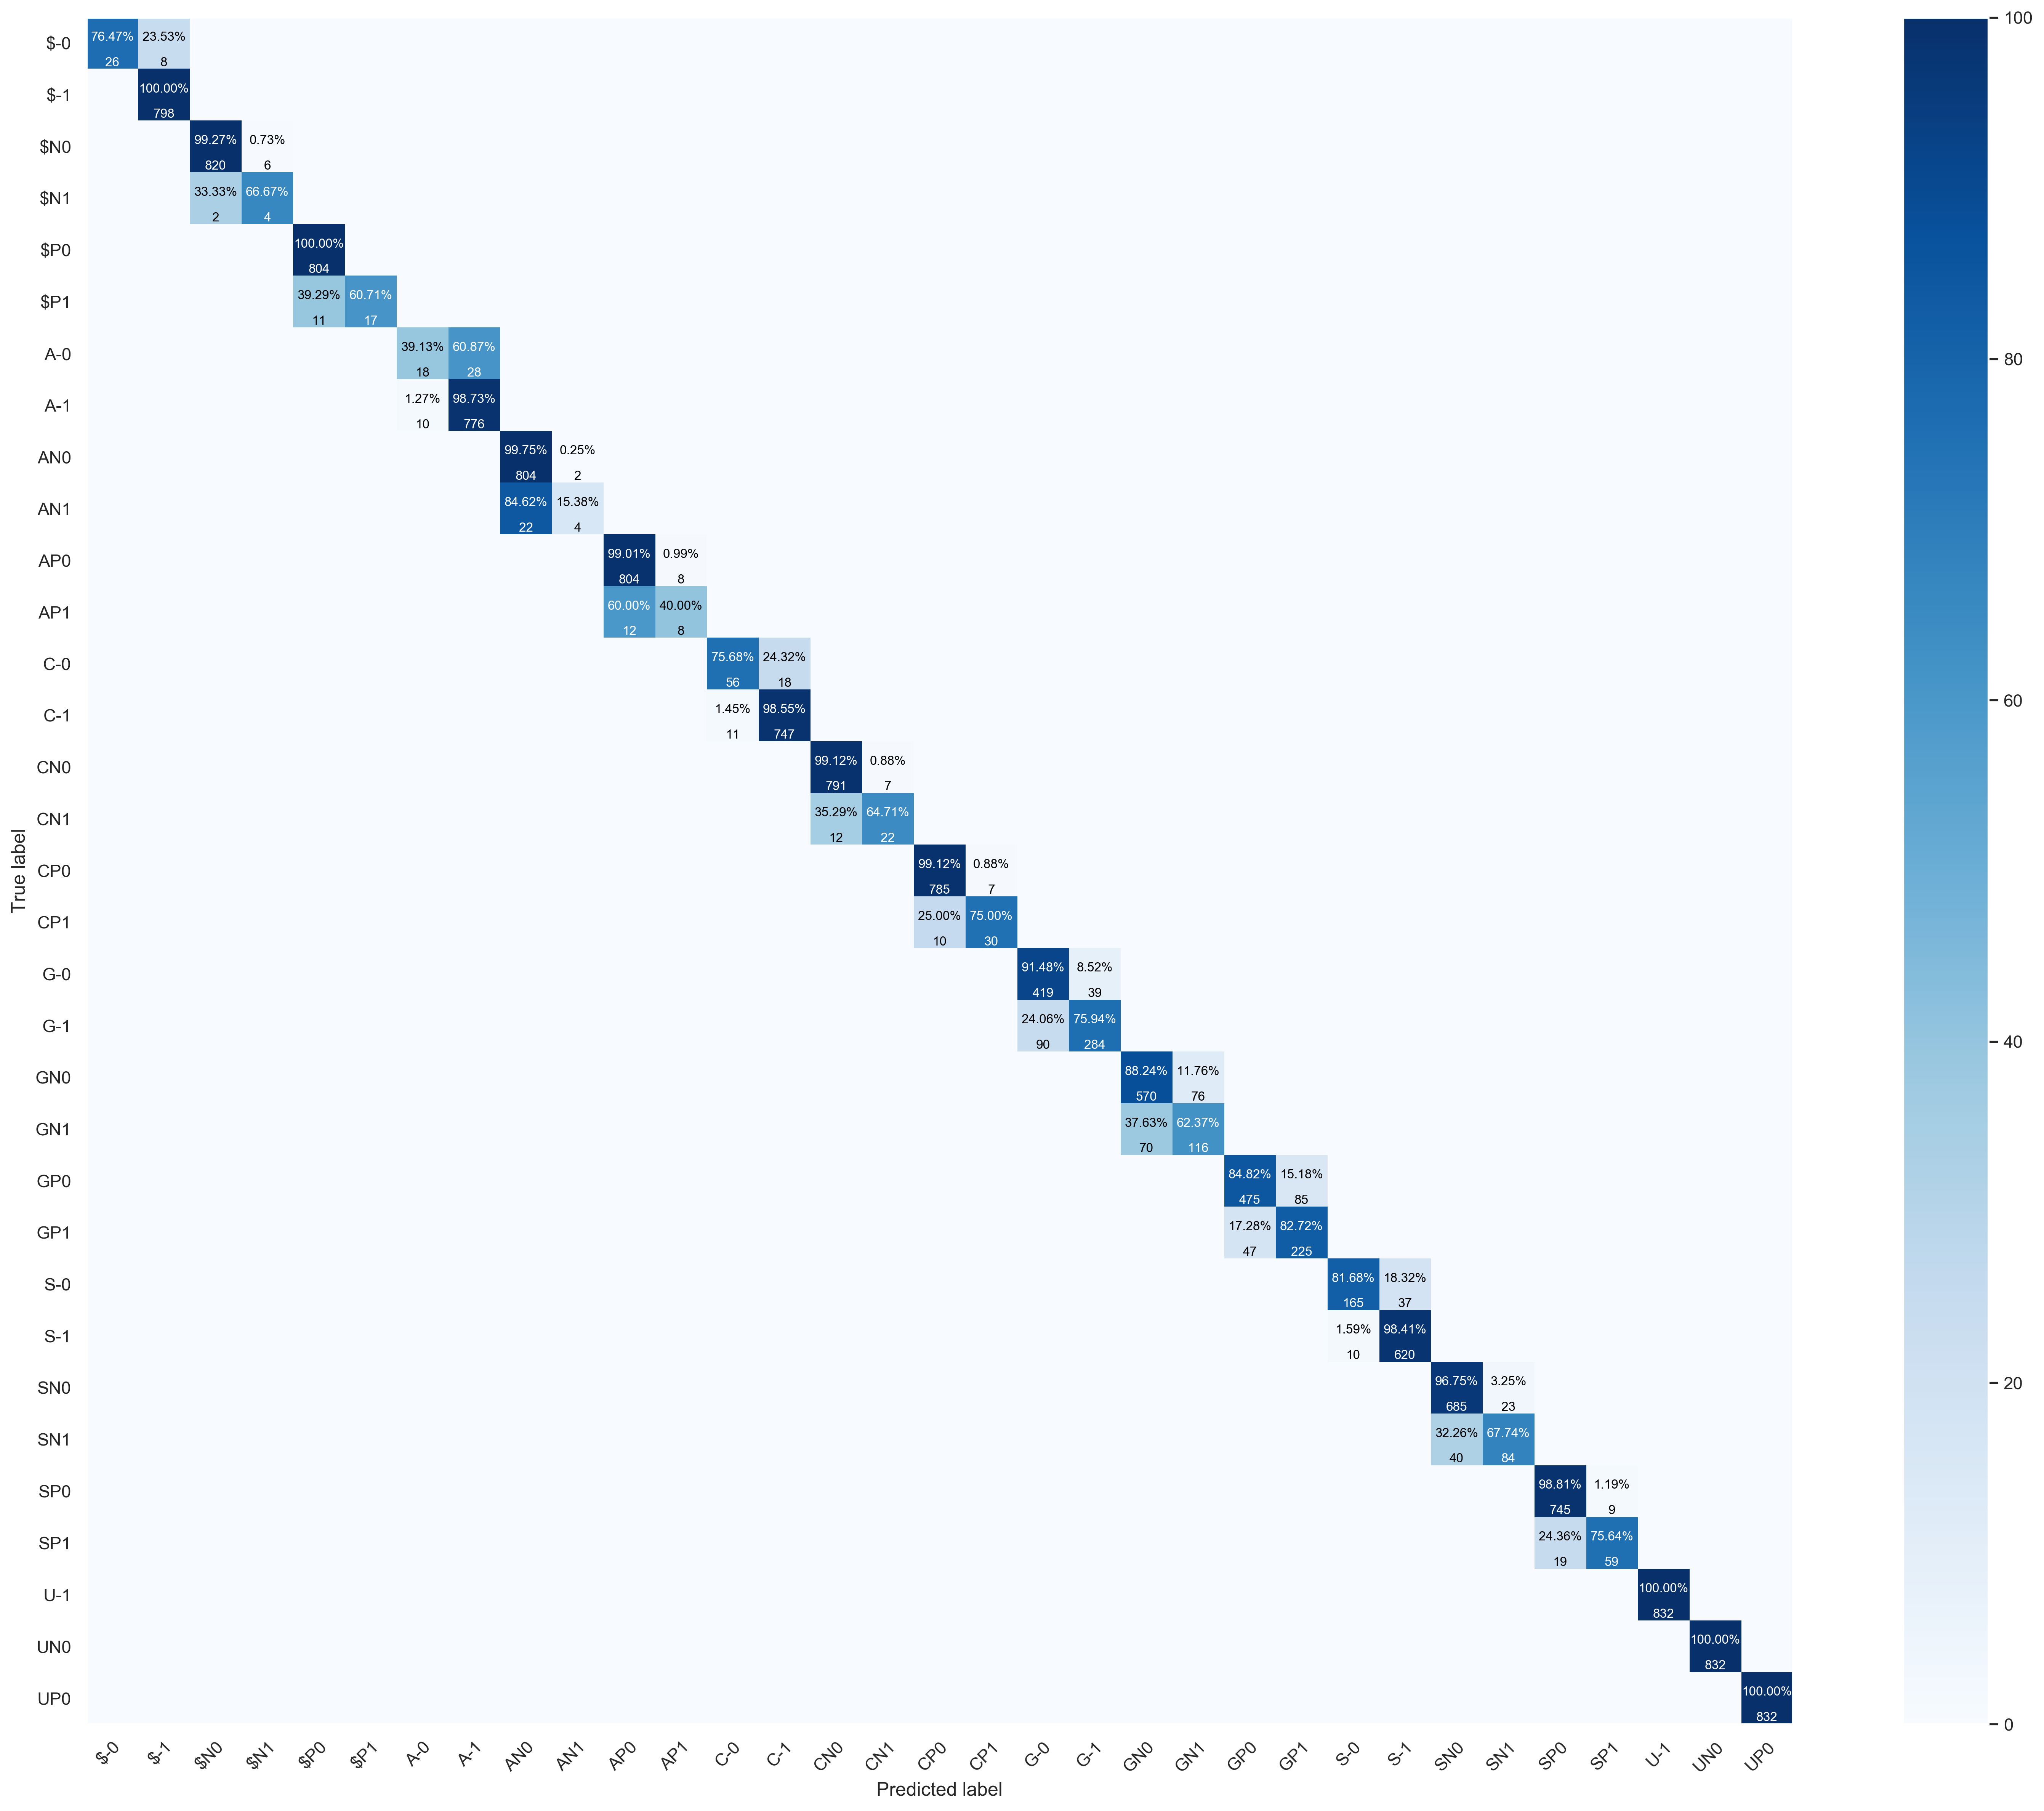

In [79]:
plot_confusion_matrix(y_real, y_pred, classes=unique_labels(y_pred))

# Matriz de confusión sin "None" y sin "No"

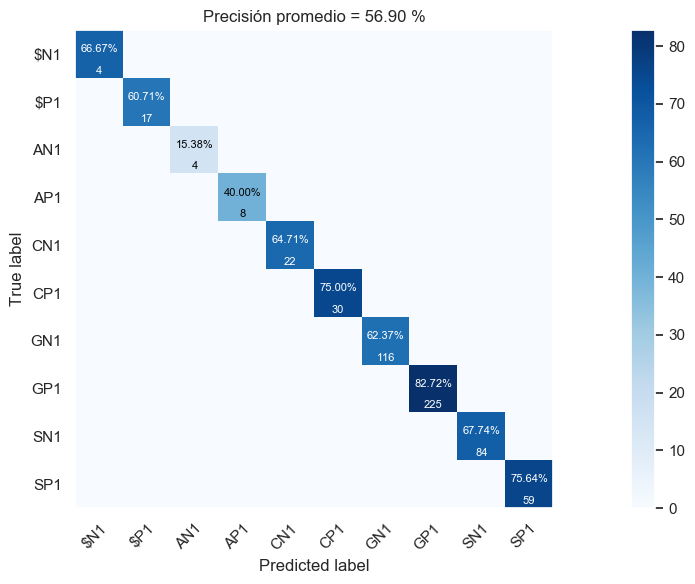

In [107]:
plot_confusion_matrix(y_real, y_pred, classes=unique_labels(y_pred), clean=True, figsize=(16, 6), dpi=100)